# Predictive Maintenance Dashboard
Simulated automotive fault prediction using Python.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Generate synthetic data ---
np.random.seed(0)
df = pd.DataFrame({
    'engine_temp': np.random.normal(90, 5, 10000),
    'vibration': np.random.normal(0.5, 0.1, 10000),
    'mileage_km': np.random.randint(0, 200000, 10000),
})
df['failure'] = (df['engine_temp'] > 95) | (df['vibration'] > 0.65)

# Save CSV
df.to_csv('predictive_data.csv', index=False)
df.head()

,engine_temp,vibration,mileage_km,failure
0,98.820262,0.479788,106580,True
1,92.000786,0.416677,93117,False
2,94.893690,0.673360,96339,True
3,101.204466,0.519065,151553,True
4,99.337790,0.482219,87094,True


## Data Visualisation

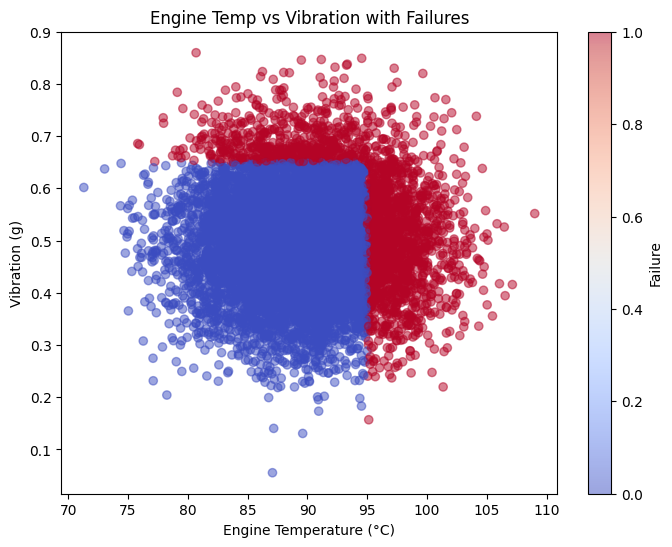

In [2]:
# Scatter plot: Engine Temp vs Vibration
plt.figure(figsize=(8,6))
plt.scatter(df['engine_temp'], df['vibration'], c=df['failure'], cmap='coolwarm', alpha=0.5)
plt.xlabel('Engine Temperature (°C)')
plt.ylabel('Vibration (g)')
plt.title('Engine Temp vs Vibration with Failures')
plt.colorbar(label='Failure')
plt.show()

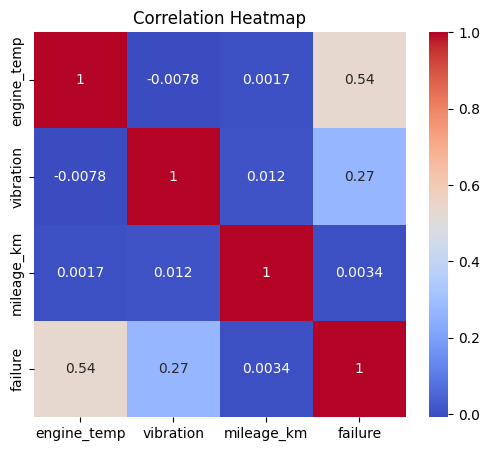

In [3]:
# Correlation heatmap
plt.figure(figsize=(6,5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Summary Statistics

In [4]:
summary = df.groupby('failure').mean()
print(summary)

         engine_temp  vibration     mileage_km
failure                                       
False      88.550508   0.487246  100631.982689
True       95.057331   0.553655  101121.470278
